In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, shapiro, ttest_ind, levene
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [24]:
df2=pd.read_csv('Survey-1.csv')
df2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [25]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [26]:
df2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## 2.1.1 Gender and Major

In [28]:
 pd.crosstab(df2['Gender'],df2['Major'],margins=True,margins_name='Total')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


#### Above Contingency table gives an clear idea of gender with aspect of various major.

## 2.1.2 Gender and Grad Intention

In [29]:
pd.crosstab(df2['Gender'],df2['Grad Intention'],margins=True,margins_name='Total')

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


#### Above Contingency table gives an clear idea of gender with aspect of various Graduate intention.

## 2.1.3 Gender and Employment

In [30]:
pd.crosstab(df2['Gender'],df2['Employment'],margins=True,margins_name='Total')

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


#### Above Contingency table gives an clear idea of gender with aspect of Employment status.

## 2.1.4  Gender and Computer

In [31]:
pd.crosstab(df2['Gender'],df2['Computer'],margins=True,margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


#### Above Contingency table gives an clear idea of gender with aspect of computer.

## 2.2  Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



In [32]:
df2['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

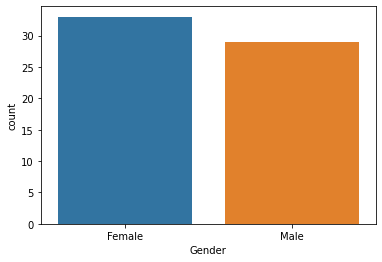

In [33]:
sns.countplot(x='Gender',data=df2);

# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [34]:
print('Probability that a randomly selected CSMU Student will be male:',29/len(df2['Gender']))

Probability that a randomly selected CSMU Student will be male: 0.46774193548387094


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [35]:
print('Probability that a randomly selected CSMU Student will be Female:',33/len(df2['Gender']))

Probability that a randomly selected CSMU Student will be Female: 0.532258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [36]:
df2[df2['Gender']=='Male'].count()

ID                   29
Gender               29
Age                  29
Class                29
Major                29
Grad Intention       29
GPA                  29
Employment           29
Salary               29
Social Networking    29
Satisfaction         29
Spending             29
Computer             29
Text Messages        29
dtype: int64

In [37]:
df2[df2['Gender']=='Female'].count()

ID                   33
Gender               33
Age                  33
Class                33
Major                33
Grad Intention       33
GPA                  33
Employment           33
Salary               33
Social Networking    33
Satisfaction         33
Spending             33
Computer             33
Text Messages        33
dtype: int64

In [38]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


# 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [39]:
print('Among Male students in CMSU:')
print('Probability of Accounting: ',4/29)
print('Probability of CIS:',1/29)
print('Probability of Economics/Finance: ',4/29)
print('Probability of International Buisness: ',2/29)
print('Probability of Management: ',6/29)
print('Probability of Other: ',4/29)
print('Probability of Retailing/Marketing: ',5/29)
print('Probability of undecided: ',3/29)

Among Male students in CMSU:
Probability of Accounting:  0.13793103448275862
Probability of CIS: 0.034482758620689655
Probability of Economics/Finance:  0.13793103448275862
Probability of International Buisness:  0.06896551724137931
Probability of Management:  0.20689655172413793
Probability of Other:  0.13793103448275862
Probability of Retailing/Marketing:  0.1724137931034483
Probability of undecided:  0.10344827586206896


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [40]:
print('Among FEMALE students in CMSU: ')
print('Probability of Accounting: ',3/33)
print('Probability of CIS: ',3/33)
print('Probability of Economics/Finance: ',7/33)
print('Probability of International Buisness: ',4/33)
print('Probability of Management: ',4/33)
print('Probability of Other: ',3/33)
print('Probability of Retailing/Marketing: ',9/33)
print('Probability of undecided: ',0/33)

Among FEMALE students in CMSU: 
Probability of Accounting:  0.09090909090909091
Probability of CIS:  0.09090909090909091
Probability of Economics/Finance:  0.21212121212121213
Probability of International Buisness:  0.12121212121212122
Probability of Management:  0.12121212121212122
Probability of Other:  0.09090909090909091
Probability of Retailing/Marketing:  0.2727272727272727
Probability of undecided:  0.0


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [41]:
pd.crosstab(df2['Gender'],df2['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [42]:
print('The probability that a randomly chosen student is a male and intends to graduate is ',17/62)

The probability that a randomly chosen student is a male and intends to graduate is  0.27419354838709675


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [43]:
pd.crosstab(df2['Gender'],df2['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [44]:
print('The probability that a randomly selected student is a female and does NOT have a laptop is ',4/62)

The probability that a randomly selected student is a female and does NOT have a laptop is  0.06451612903225806


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [45]:
pd.crosstab(df2['Gender'],df2['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [46]:
print('The probability that a randomly chosen student is a male or has full-time employment is',(29+10-7)/(62))

The probability that a randomly chosen student is a male or has full-time employment is 0.5161290322580645


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [47]:
pd.crosstab(df2['Gender'],df2['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [48]:
print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is ',(4+4)/33)

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is  0.24242424242424243


# 2.6  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [49]:
df2_GI=pd.crosstab(df2['Gender'],df2['Grad Intention'],margins=True)
df2_GI

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [50]:
GI_subset = df2[(df2['Grad Intention']== 'Yes') | (df2['Grad Intention']=='No')].reset_index(drop=True)
GI_subset ['Grad Intention'].unique()

array(['Yes', 'No'], dtype=object)

In [51]:
pd.crosstab(GI_subset['Gender'], GI_subset['Grad Intention'],margins=True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


#### We get a clear idea for contingency table of Gender and Intent to Graduate at 2 levels.

# 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data



# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [52]:
df2['Gender'].groupby(df2['GPA']).value_counts()

GPA  Gender
2.3  Female    1
2.4  Female    1
2.5  Male      4
     Female    2
2.6  Male      2
2.8  Male      2
     Female    1
2.9  Female    3
     Male      1
3.0  Female    5
     Male      2
3.1  Male      5
     Female    2
3.2  Female    4
     Male      2
3.3  Female    3
     Male      2
3.4  Male      5
     Female    2
3.5  Female    4
     Male      2
3.6  Male      2
     Female    1
3.7  Female    2
3.8  Female    1
3.9  Female    1
Name: Gender, dtype: int64

In [53]:
df2[df2['GPA']<3].count()

ID                   17
Gender               17
Age                  17
Class                17
Major                17
Grad Intention       17
GPA                  17
Employment           17
Salary               17
Social Networking    17
Satisfaction         17
Spending             17
Computer             17
Text Messages        17
dtype: int64

In [54]:
print('The probability that his/her GPA is less than 3 is',17/62)

The probability that his/her GPA is less than 3 is 0.27419354838709675


#### As we found earlier the total number of male and female is 62  and total his/her GPA <3 is 17 so by using the formula we found out the probability.

# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [55]:
df2[df2['Salary']>=50].count()

ID                   32
Gender               32
Age                  32
Class                32
Major                32
Grad Intention       32
GPA                  32
Employment           32
Salary               32
Social Networking    32
Satisfaction         32
Spending             32
Computer             32
Text Messages        32
dtype: int64

In [56]:
df2[(df2['Gender']=='Male') & (df2['Salary']>=50)].count()

ID                   14
Gender               14
Age                  14
Class                14
Major                14
Grad Intention       14
GPA                  14
Employment           14
Salary               14
Social Networking    14
Satisfaction         14
Spending             14
Computer             14
Text Messages        14
dtype: int64

In [57]:
print('The conditional probability that a randomly selected male earns 50 or more is',14/29)

The conditional probability that a randomly selected male earns 50 or more is 0.4827586206896552


In [58]:
df2[(df2['Gender']=='Female') & (df2['Salary']>=50)].count()

ID                   18
Gender               18
Age                  18
Class                18
Major                18
Grad Intention       18
GPA                  18
Employment           18
Salary               18
Social Networking    18
Satisfaction         18
Spending             18
Computer             18
Text Messages        18
dtype: int64

In [59]:
print('The conditional probability that a randomly selected Female earns 50 or more is',18/33)

The conditional probability that a randomly selected Female earns 50 or more is 0.5454545454545454


# 2.8  Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [60]:
GPA_mean = df2['GPA'].mean()
GPA_Std = df2['GPA'].std()
SLY_mean = df2['Salary'].mean()
SLY_Std = df2['Salary'].std()
SPEND_mean = df2['Spending'].mean()
SPEND_Std = df2['Spending'].std()
Text_mean = df2['Text Messages'].mean()
Text_Std = df2['Text Messages'].std()

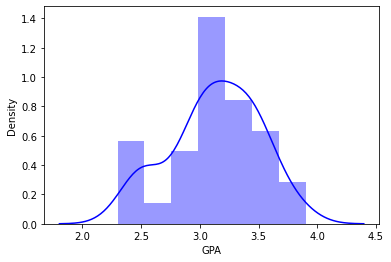

In [61]:
sns.distplot(df2['GPA'],color='b');

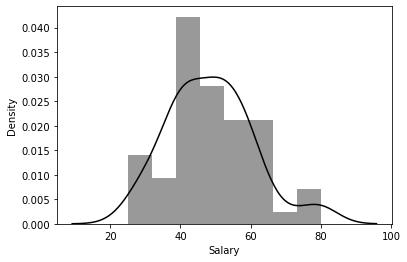

In [62]:
sns.distplot(df2['Salary'],color='k');

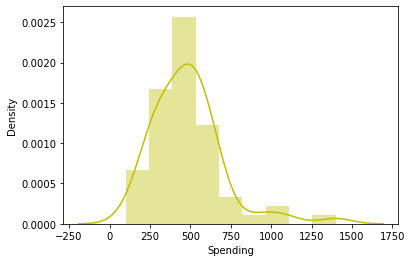

In [63]:
sns.distplot(df2['Spending'],color='y');

<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

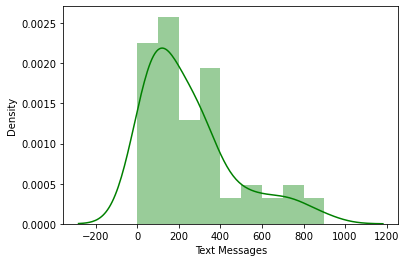

In [64]:
sns.distplot(df2['Text Messages'],color='g')

In [65]:
shapiro(df2['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

In [66]:
shapiro(df2['Salary'])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

In [67]:
shapiro(df2['Spending'])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

In [68]:
shapiro(df2['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)